In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Law of Large Numbers

Let's say we play a game of dice. The dice has equal probability of being a value from [1,6], inclusive. Each side of the dice is associated with a probabilty. This is called a Random Variable.

In [32]:
oneRoll = np.random.randint(1,7) #[1,7)
print(oneRoll)
print('Ask the person next to you what they got? Did they get the same number? Try running this cell again.')

5
Ask the person next to you what they got? Did they get the same number? Try running this cell again.


When we generate random variables (each side of the dice) from a distribution (dice), we should expect ~1/6 (0.1667) probability for each side of the dice.

Again, is this what you expected? Why or why not? What happens if you increase the side in the above function?


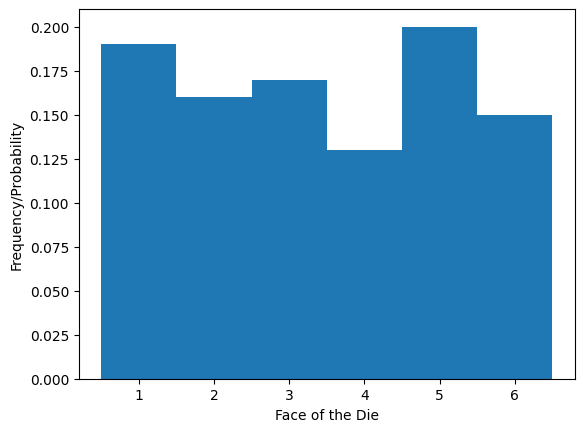

In [37]:
plt.hist(np.random.randint(1, 7, size=100), bins=np.linspace(0.5, 6.5, 7), density=True) #Density normalizes frequencies
# What happens when we increase the size?
print('Again, is this what you expected? Why or why not? What happens if you increase the side in the above function?')
plt.ylabel("Frequency/Probability")
plt.xlabel("Face of the Die")
plt.show()

### Let's compute the average of each round of simulation.

Text(0.5, 0, 'Num experiment')

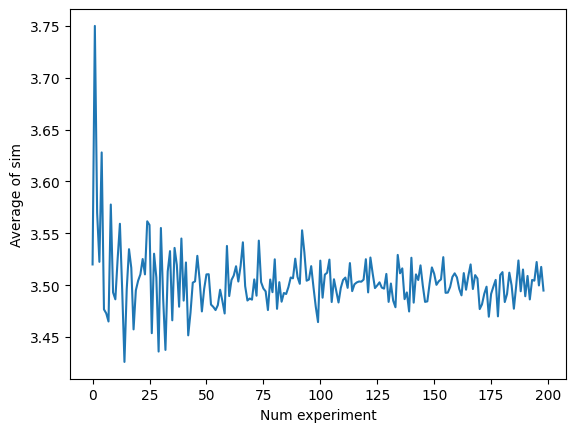

In [4]:
# Simulate a dice roll 100 times, then 200 times, then 300 times...etc. (up to N times) to see each average
N = 20000
simulations = range(100, N, 100) # increasing number of rolls by 100
outcomes = []

for rolls in simulations:
    average = np.mean(np.random.randint(1,7, size = rolls))
    outcomes = outcomes + [average]

plt.plot(outcomes)
plt.ylabel("Average of sim")
plt.xlabel("Num experiment")

In [5]:
outcomes

[3.52,
 3.75,
 3.57,
 3.5225,
 3.628,
 3.4766666666666666,
 3.472857142857143,
 3.465,
 3.577777777777778,
 3.493,
 3.4863636363636363,
 3.525,
 3.559230769230769,
 3.4957142857142856,
 3.426,
 3.49625,
 3.534705882352941,
 3.5166666666666666,
 3.4573684210526316,
 3.495,
 3.5042857142857144,
 3.5104545454545453,
 3.5252173913043476,
 3.5104166666666665,
 3.5616,
 3.558076923076923,
 3.4537037037037037,
 3.530357142857143,
 3.5075862068965518,
 3.436,
 3.5551612903225807,
 3.486875,
 3.4375757575757575,
 3.513235294117647,
 3.532857142857143,
 3.466111111111111,
 3.535945945945946,
 3.5194736842105265,
 3.479230769230769,
 3.545,
 3.4851219512195124,
 3.521904761904762,
 3.451627906976744,
 3.473409090909091,
 3.5024444444444445,
 3.503695652173913,
 3.5282978723404255,
 3.5054166666666666,
 3.4746938775510205,
 3.4964,
 3.510392156862745,
 3.5105769230769233,
 3.481320754716981,
 3.479074074074074,
 3.476,
 3.480714285714286,
 3.495614035087719,
 3.4848275862068965,
 3.47271186440678,

In [6]:
np.mean(outcomes) # Is this what we should expect?

3.5038959516314643

(array([  6.,  46., 116.,  24.,   5.,   0.,   1.,   0.,   0.,   1.]),
 array([3.426 , 3.4584, 3.4908, 3.5232, 3.5556, 3.588 , 3.6204, 3.6528,
        3.6852, 3.7176, 3.75  ]),
 <BarContainer object of 10 artists>)

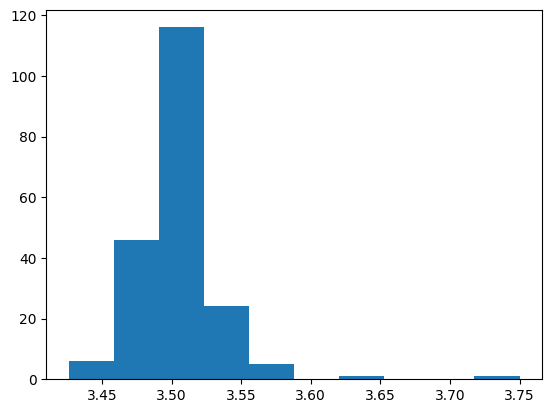

In [7]:
plt.hist(outcomes) # CLT: Is this what we should expect as well? 

Essentially, the Central Limit Theorem states that taking random samples with replacement, and then taking the average of those samples, the averages will follow a normal distribution.

(See https://seeing-theory.brown.edu/probability-distributions/index.html#section3)

Normal distribution is everywhere. We will see this again when we do stock returns.

# Monte Carlo: Estimating Pi

$$\frac{N_{circle}}{N_{total}} = \frac{Area_{circle}}{Area_{Square}}$$

$$Area_{Square} * \frac{N_c}{N_{total}} = Area_{circle}$$

In [23]:
# Setting up the experiments
trials = 10000 # how does the number of trials affect the result?
radius = 1
inside = 0 #num points inside circle
outside = 0

x_coords = np.random.uniform(-1, 1, trials)
y_coords = np.random.uniform(-1, 1, trials)
print(x_coords)

[ 0.88368    -0.12851561 -0.64321604 ...  0.46133441  0.75031339
  0.74343665]


In [24]:
# running the experiments and storing the results
for i in range(trials):
    if (x_coords[i]**2 + y_coords[i]**2 <= radius**2):
        inside += 1
    else:  
        outside += 1

In [25]:
ratio_circle = inside / (inside + outside) #inside + outside = trials
print(ratio_circle)

0.7879


In [26]:
print("pi is about", 2*radius*2*ratio_circle)

pi is about 3.1516


# Visualizing

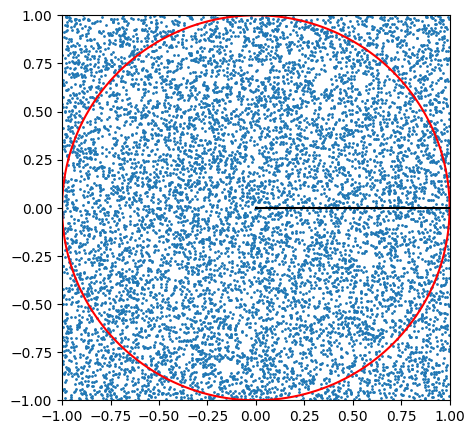

In [27]:
theta = np.linspace(0, 2*np.pi, 1000)
x = radius*np.cos(theta)
y = radius*np.sin(theta)

plt.figure(figsize = (5,5))
plt.plot(x, y, color = 'red')
plt.plot(np.linspace(0, 1, 1000), np.zeros(1000), color = "black")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.scatter(x_coords, y_coords, s = 1)

# VaR Demonstration

In [2]:
# Portfolio setup
current_portfolio_value = 100000  # Assume the portfolio is worth $100,000
asset_mean_return = 0.001  # Mean daily return of the asset (can be historical)
asset_volatility = 0.02  # Daily volatility of the asset (standard deviation)

# Parameters
days = 1  # VaR over a 1-day horizon
num_simulations = 10000  # Number of Monte Carlo simulations

# Simulating returns using random samples from normal distribution
simulated_returns = np.random.normal(asset_mean_return, asset_volatility, num_simulations)

# Simulate portfolio value changes
portfolio_value_changes = current_portfolio_value * simulated_returns

In [3]:
# Calculate VaR at different confidence levels
VaR_95 = np.percentile(portfolio_value_changes, 5)  # 95% confidence level
VaR_99 = np.percentile(portfolio_value_changes, 1)  # 99% confidence level

print(f"1-Day VaR at 95% confidence level: ${abs(VaR_95):.2f}")
print(f"1-Day VaR at 99% confidence level: ${abs(VaR_99):.2f}")


1-Day VaR at 95% confidence level: $3182.64
1-Day VaR at 99% confidence level: $4655.95


- VaR 95%: "With 95% confidence, we expect the maximum loss over a 1-day period to be $X. There is a 5% chance the loss will exceed this amount."
- VaR 99%: "With 99% confidence, we expect the maximum loss over a 1-day period to be $Y. There is only a 1% chance the loss will exceed this amount."

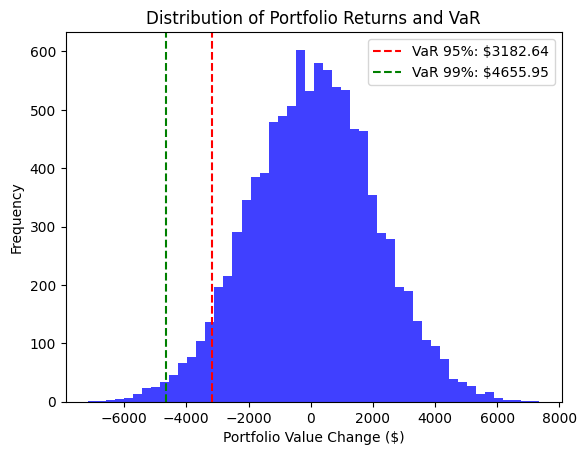

In [4]:
# Plot the distribution of portfolio changes
plt.hist(portfolio_value_changes, bins=50, alpha=0.75, color='b')

# Highlight VaR thresholds
plt.axvline(x=VaR_95, color='r', linestyle='--', label=f'VaR 95%: ${abs(VaR_95):.2f}')
plt.axvline(x=VaR_99, color='g', linestyle='--', label=f'VaR 99%: ${abs(VaR_99):.2f}')

plt.title('Distribution of Portfolio Returns and VaR')
plt.xlabel('Portfolio Value Change ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed
1-Day VaR at 95% confidence level: $1889.83
1-Day VaR at 99% confidence level: $2704.69


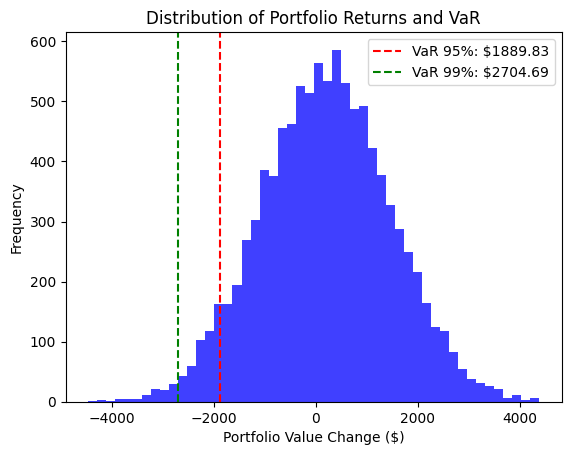

In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stock ticker and period for historical data
ticker = 'AAPL'  # Replace with any ticker you want to analyze
data = yf.download(ticker, start='2022-01-01', end='2024-01-01')

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Portfolio setup
initial_portfolio_value = 100000  # Assume the portfolio is worth $100,000
mean_return = data['Returns'].mean()  # Mean daily return
volatility = data['Returns'].std()  # Daily volatility (standard deviation)

# Monte Carlo simulation parameters
num_simulations = 10000
days = 1  # 1-day horizon

# Simulate portfolio returns
simulated_returns = np.random.normal(mean_return, volatility, num_simulations)

# Simulate portfolio value changes
portfolio_value_changes = initial_portfolio_value * simulated_returns

# Calculate VaR at 95% and 99% confidence levels
VaR_95 = np.percentile(portfolio_value_changes, 5)
VaR_99 = np.percentile(portfolio_value_changes, 1)

# Output results
print(f"1-Day VaR at 95% confidence level: ${abs(VaR_95):.2f}")
print(f"1-Day VaR at 99% confidence level: ${abs(VaR_99):.2f}")

# Plot the distribution of portfolio changes
plt.hist(portfolio_value_changes, bins=50, alpha=0.75, color='b')

# Highlight VaR thresholds
plt.axvline(x=VaR_95, color='r', linestyle='--', label=f'VaR 95%: ${abs(VaR_95):.2f}')
plt.axvline(x=VaR_99, color='g', linestyle='--', label=f'VaR 99%: ${abs(VaR_99):.2f}')

plt.title('Distribution of Portfolio Returns and VaR')
plt.xlabel('Portfolio Value Change ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# note assumption of normality in returns
# what if we try using the actual distribution of returns?

1-Day Historical VaR at 95% confidence level: $1717.65
1-Day Historical VaR at 99% confidence level: $2801.60


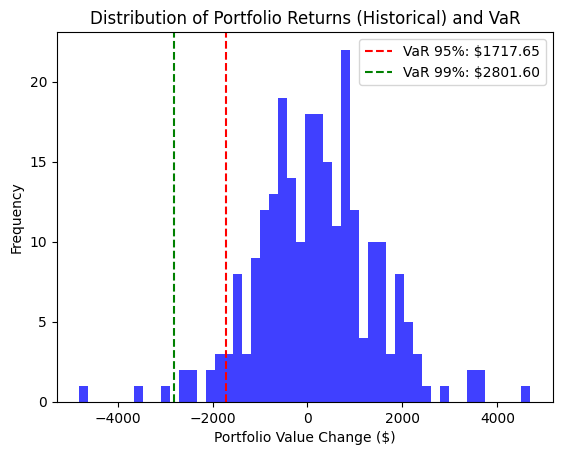

In [6]:
returns = data['Returns'].dropna()

# Sort returns in ascending order
sorted_returns = np.sort(returns)

# Calculate portfolio value changes
portfolio_value_changes = initial_portfolio_value * sorted_returns

# Calculate VaR at 95% and 99% confidence levels based on historical returns
VaR_95 = np.percentile(portfolio_value_changes, 5)
VaR_99 = np.percentile(portfolio_value_changes, 1)

# Output results
print(f"1-Day Historical VaR at 95% confidence level: ${abs(VaR_95):.2f}")
print(f"1-Day Historical VaR at 99% confidence level: ${abs(VaR_99):.2f}")

# Plot the distribution of portfolio value changes
plt.hist(portfolio_value_changes, bins=50, alpha=0.75, color='b')

# Highlight VaR thresholds
plt.axvline(x=VaR_95, color='r', linestyle='--', label=f'VaR 95%: ${abs(VaR_95):.2f}')
plt.axvline(x=VaR_99, color='g', linestyle='--', label=f'VaR 99%: ${abs(VaR_99):.2f}')

plt.title('Distribution of Portfolio Returns (Historical) and VaR')
plt.xlabel('Portfolio Value Change ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Portfolio setup
initial_portfolio_value = 100000  # Assume the portfolio is worth $100,000
mean_return = data['Returns'].mean()  # Mean daily return
volatility = data['Returns'].std()  # Daily volatility (standard deviation)

# Monte Carlo simulation parameters
num_simulations = 10000
days = 1  # 1-day horizon

# Simulate portfolio returns
simulated_returns = np.random.normal(mean_return, volatility, num_simulations)

# Simulate portfolio value changes
portfolio_value_changes = initial_portfolio_value * simulated_returns

# Calculate VaR at 95% and 99% confidence levels
VaR_95 = np.percentile(portfolio_value_changes, 5)
VaR_99 = np.percentile(portfolio_value_changes, 1)

# Output results
print(f"1-Day VaR at 95% confidence level: ${abs(VaR_95):.2f}")
print(f"1-Day VaR at 99% confidence level: ${abs(VaR_99):.2f}")

# Plot the distribution of portfolio changes
plt.hist(portfolio_value_changes, bins=50, alpha=0.75, color='b')

# Highlight VaR thresholds
plt.axvline(x=VaR_95, color='r', linestyle='--', label=f'VaR 95%: ${abs(VaR_95):.2f}')
plt.axvline(x=VaR_99, color='g', linestyle='--', label=f'VaR 99%: ${abs(VaR_99):.2f}')

plt.title('Distribution of Portfolio Returns and VaR')
plt.xlabel('Portfolio Value Change ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Simulating our application question

Imagine you are managing a fund which has two trading strategies. 


Strategy A: 50% of the time you lose 20% of your investment, and the rest of the time you gain 50% on your investment.
Strategy B: 90% of the time you lose 5% of your investment, and the rest of the time you gain 195% on your investment.


Which strategy should you use? Please explain with relevant statistical concepts in a few (~2-5) sentences.

This question has some openendedness to it. 

In [29]:
# let's calculate the expected value and variance for each strategy
# FOR A SINGLE TRIAL
strategy_a_ev = 0.5 * 0.8 + 0.5 * 1.5
strategy_a_var = 0.5 * (0.8 - strategy_a_ev)**2 + 0.5 * (1.5 - strategy_a_ev)**2
print(f"Strategy A: EV = {strategy_a_ev}, Var = {strategy_a_var}")

strategy_b_ev = 0.9 * 0.95 + 0.1 * 2.95
strategy_b_var = 0.9 * (0.95 - strategy_b_ev)**2 + 0.1 * (2.95 - strategy_b_ev)**2
print(f"Strategy B: EV = {strategy_b_ev}, Var = {strategy_b_var}")

print('Note that this is just for a single execution of the strategy. This is important!')

Strategy A: EV = 1.15, Var = 0.12249999999999998
Strategy B: EV = 1.15, Var = 0.3600000000000001
Note that this is just for a single execution of the strategy. This is important!


### But how about multiple days/executions of the strategy? What happens? 

In [30]:
# let's simulate trials
n_trials = 1000
n_days = 30
strategy_a_results = []
strategy_a_all_returns = []
strategy_b_results = []
strategy_b_all_returns = []

for i in range(n_trials):
    strategy_a_returns = [1]
    strategy_b_returns = [1]
    for j in range(n_days):
        strategy_a_returns.append(
            strategy_a_returns[-1] * np.random.choice([0.8, 1.5], p=[0.5, 0.5]))
        
        strategy_b_returns.append(
            strategy_b_returns[-1] * np.random.choice([0.95, 2.95], p=[0.9, 0.1]))

    strategy_a_results.append(strategy_a_returns)
    strategy_b_results.append(strategy_b_returns)
    strategy_a_all_returns.append(strategy_a_returns[-1])
    strategy_b_all_returns.append(strategy_b_returns[-1])

# calculate average final returns
strategy_a_avg = np.mean(strategy_a_all_returns)
strategy_b_avg = np.mean(strategy_b_all_returns)

# output results
print(f"Strategy A: Average final return = {strategy_a_avg}")
print(f"Strategy B: Average final return = {strategy_b_avg}")


Strategy A: Average final return = 64.09767826331891
Strategy B: Average final return = 39.547973309829786


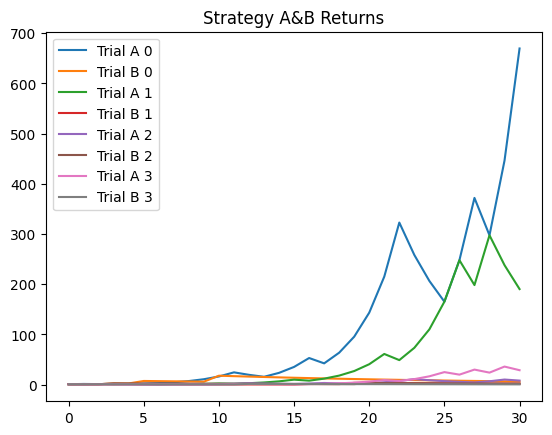

In [31]:
# plot 10 trials
plt.figure()
for i in range(4):
    plt.plot(strategy_a_results[i], label=f"Trial A {i}")
    plt.plot(strategy_b_results[i], label=f"Trial B {i}")
plt.title("Strategy A&B Returns")
plt.legend()

### Now for you to implement:
1. What if we don't use 100% of our buying power each trial? (eg: we now gain/lose 50% of the change)
- np.random.choice([0.8, 1.5], p=[0.5, 0.5]) selects 0.8 or 1.5 with probability 0.5. How might we change the return? 
2. What happens if we can execute Strategy B twice as often as Strategy A? Three times? etc.
- Can we just multiply the end result by 2 or 3?
3. Create histograms of the various returns.
- hint: plt.hist()
4. Calculate sharpe and sortino ratio.
- What might these say about the strategies?
5. Plot median returns, average returns, etc.
- Why might we want to consider median return vs average return?
6. What percent of Strategy A and B trials go below some threshold, say 0.25? What might this say?


# Other Interesting Questions

# #1
![Estimating e](https://ggcarvalho.dev/img/posts/montecarlo/lex.png)

Tips:

1. np.mean(list) gives you the expected value of the list of values
2. list.append(n) adds the number 'n' to the end of the list
3. Always set up the experiment with a for loop of number of trials
4. Think about what variable needs to be resetted after every trial
5. While or for loop? Do you know how many selections needed?

# #2

## On average, how many times a die must be rolled until you get a 6?

Tips:

1. np.random.randint(1,7) simulates a dice roll [1,7)
2. While or for loop? Do you know how many selections needed?
3. What should you expect?

# #3

## If you break a stick of unit length at a point chosen uniformly at random, then what is the expected length of the shorter stick? What about the ratio of smaller to longer?

# #4

## An unfair coin is rolled 100 times. The probability of tails is 38 percent. What is the probability that there at least 40 heads? Use plt.hist() to see if your answer makes sense.

Tips:

1. np.random.binomial? How many trials, what's the probability, and what should n be? (Hint: Flipping 1 coin is a Bernoulli process)

# #5

## Benford's Law? Make a histogram plot of first digit in a distribution of numbers. (What distribution should you do? What do you assume?)

In [13]:
# Benford's Law says that the leading digit of real life numerical dataset is likely to be small. 
# For example, 1 should occur the most as the leading digit, 2 the second most, etc.
# Pretty cool to read about. https://en.wikipedia.org/wiki/Benford%27s_law



# #6

## Recreate the Monty Hall Problem and see if it is actually good to switch doors (Hint: it is).